In [ ]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import feature_selection as fs
from sklearn.model_selection import cross_validate
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mount drive

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### A customer Adventure Works has asked us to predict the avg total spend from customers based on features we will need to extract from 3 separate datasets

In [ ]:
# load first dataset. Load and take a look at first 5 entries

Customers = pd.read_csv("/gdrive/My Drive/AdvWorksCusts.csv")
Customers.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [ ]:
# Check datatypes
Customers.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

In [ ]:
# Check for null values 
Customers.isnull().any()

CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

In [ ]:
# Check the shape of the dataset

Customers.shape

(16519, 23)

In [ ]:
# Second dataset, load and take a look at the first five entries

AveMonthSpend = pd.read_csv("/gdrive/My Drive/AW_AveMonthSpend.csv")

In [ ]:
# Note our target on this one

AveMonthSpend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [ ]:
# Check the shape, same as previous so do not alter until combining

AveMonthSpend.shape

(16519, 2)

In [ ]:
#Check for null values

AveMonthSpend.isnull().any()

CustomerID       False
AveMonthSpend    False
dtype: bool

In [ ]:
# Check data types

AveMonthSpend.dtypes

CustomerID       int64
AveMonthSpend    int64
dtype: object

In [ ]:
# Load the next dataset check the first 5 entries

BikeBuyer = pd.read_csv("/gdrive/My Drive/AW_BikeBuyer.csv")
BikeBuyer.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [ ]:
# Check the shape of the dataset

BikeBuyer.shape

(16519, 2)

In [ ]:
# Check for null values

BikeBuyer.isnull().any()

CustomerID    False
BikeBuyer     False
dtype: bool

In [ ]:
# Check the datatypes

BikeBuyer.dtypes

CustomerID    int64
BikeBuyer     int64
dtype: object

In [ ]:
# Do inner join on Customer ID, we'll call the dataset AWS for adventure works

AWS = pd.merge(Customers, AveMonthSpend, on='CustomerID')
AWS.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [ ]:
# Check the shape

AWS.shape

(16749, 24)

In [ ]:
# Merge third data set also with an inner join on Customer ID

AWS = pd.merge(AWS, BikeBuyer, on='CustomerID')
AWS.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1


In [ ]:
# Check the shape

AWS.shape

(17209, 25)

In [ ]:
# Let's see which columns have null values and how many nulls

AWS.isnull().sum()

CustomerID                  0
Title                   17121
FirstName                   0
MiddleName               7189
LastName                    0
Suffix                  17207
AddressLine1                0
AddressLine2            16918
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
BikeBuyer                   0
dtype: int64

In [ ]:
# We know the customer ID column is complete
# These columns have no prediction value and can be safely dropped. The rows will retain
# the information we need for prediction

AWS.drop(columns=['Title','Suffix','AddressLine2','MiddleName'], inplace=True)

In [ ]:
# Check for nulls again

AWS.isnull().any()

CustomerID              False
FirstName               False
LastName                False
AddressLine1            False
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
AveMonthSpend           False
BikeBuyer               False
dtype: bool

In [ ]:
# Check the shape

AWS.shape

(17209, 21)

In [ ]:
# Check the data types after the merge

AWS.dtypes

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [ ]:
# Drop any duplicates 

AWS.drop_duplicates(inplace=True)
AWS.shape

(16471, 21)

In [ ]:
# Check basic Statistics

AWS.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16471.000000,16471.000000,16471.000000,16471.000000,16471.000000,16471.000000,16471.000000,16471.000000
mean,20228.378969,0.674458,1.499302,0.991318,2.004493,78157.339688,72.415032,0.332281
std,5340.135584,0.468591,1.137743,1.513906,1.682686,39708.922641,27.268149,0.471045
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15602.500000,0.000000,1.000000,0.000000,0.000000,47842.000000,52.000000,0.000000
50%,20217.000000,1.000000,2.000000,0.000000,2.000000,76146.000000,68.000000,0.000000
75%,24851.500000,1.000000,2.000000,2.000000,3.000000,105202.000000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [ ]:
# Check Bikebuyer vs not Bikebuyer counts

AWS['BikeBuyer'].value_counts()

0    10998
1     5473
Name: BikeBuyer, dtype: int64

In [ ]:
# Check occupation value counts
AWS.Occupation.value_counts()

Professional      4957
Skilled Manual    4058
Management        2727
Clerical          2600
Manual            2129
Name: Occupation, dtype: int64

In [ ]:
# Group income by occupation


IncomeByOccupation = AWS.groupby(['YearlyIncome', 'Occupation'])['YearlyIncome'].mean()
IncomebyOccupation = pd.DataFrame(IncomeByOccupation)
IncomebyOccupation = pd.DataFrame(IncomebyOccupation.groupby(['Occupation']).mean())
IncomebyOccupation.sort_values(by=['YearlyIncome'])

,YearlyIncome
Occupation,
Manual,23647.918468
Clerical,48661.381925
Skilled Manual,69410.132252
Professional,100406.519483
Management,121710.378067


In [ ]:
# Birthdate is typed as an object(text) when it should be datetime. Let's fix this

AWS['BirthDate'] = pd.to_datetime(AWS['BirthDate'])

In [ ]:
# Age would be a better variable for the model down the line as we need numerical data


AWS['Age'] = 1998 - AWS['BirthDate'].dt.year

In [ ]:
AWS.drop('BirthDate', axis=1, inplace=True)

In [ ]:
# Let's check the 'NumberCarsOwned' category
AWS['NumberCarsOwned'].value_counts()

2    5767
1    4357
0    3788
3    1432
4    1127
Name: NumberCarsOwned, dtype: int64

In [ ]:
# 'NumberChildrenAtHome' and 'TotalChildren' might be correlated, let's check
AWS[['NumberChildrenAtHome','TotalChildren']].corr()

,NumberChildrenAtHome,TotalChildren
NumberChildrenAtHome,1.000000,0.647287
TotalChildren,0.647287,1.000000


In [ ]:
# Which one explains more of the variance of 'AveMonthSpend'

AWS[['NumberChildrenAtHome','TotalChildren','AveMonthSpend']].corr()

,NumberChildrenAtHome,TotalChildren,AveMonthSpend
NumberChildrenAtHome,1.000000,0.647287,0.730169
TotalChildren,0.647287,1.000000,0.500206
AveMonthSpend,0.730169,0.500206,1.000000


In [ ]:
# We'll keep 'NumberChildrenAtHome' as it is more informative and drop the other

AWS.drop('TotalChildren', axis=1, inplace=True)

In [ ]:
AWS['Age'].describe()

count    16471.000000
mean        36.446725
std         11.244468
min         18.000000
25%         28.000000
50%         35.000000
75%         44.000000
max         88.000000
Name: Age, dtype: float64

In [ ]:
# It would be better to bin age so that we can group by Avg gender, Age and Marital Status and
# check their effects on AveMonthSpend

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
group_names = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
AWS['Decade'] = pd.cut(AWS['Age'], bins, labels=group_names)

In [ ]:
HighestSpend = AWS.groupby(['Gender','Decade','MaritalStatus']).mean()
HighestSpend = pd.DataFrame(HighestSpend)
HighestSpendSorted = HighestSpend.sort_values(by='AveMonthSpend')
HighestSpendSorted

CustomerID  HomeOwnerFlag  ...  BikeBuyer        Age
Gender Decade MaritalStatus                               ...                      
F      80-89  M              16995.000000       0.400000  ...   0.000000  84.600000
              S              22534.000000       0.500000  ...   0.000000  84.000000
M      80-89  M              15955.666667       0.666667  ...   0.000000  86.333333
F      70-79  M              15026.250000       0.375000  ...   0.000000  75.750000
              S              20130.428571       0.571429  ...   0.000000  73.714286
M      80-89  S              25120.000000       0.000000  ...   0.000000  83.500000
F      60-69  S              21128.781250       0.625000  ...   0.031250  63.265625
       10-19  S              20157.254753       0.433460  ...   0.346008  19.148289
M      70-79  S              26015.777778       0.111111  ...   0.000000  73.888889
F      60-69  M              19363.882353       0.786765  ...   0.007353  63.375000
       10-19  M              20426.921429       0.642857  ...   0.035714  19.121429
       50-59  S              21053.533557       0.600671  ...   0.167785  54.755034
       20-29  S              20176.579956       0.466470  ...   0.358143  25.486367
M      70-79  M              20975.833333       0.750000  ...   0.000000  73.666667
F      40-49  S              20947.959752       0.599071  ...   0.366873  44.835913
       50-59  M              19153.177264       0.805395  ...   0.080925  54.697495
       30-39  S              20326.919129       0.529549  ...   0.475117  34.793935
       20-29  M              20467.878378       0.844595  ...   0.195946  26.570463
       40-49  M              19943.774688       0.767977  ...   0.172579  45.088207
       30-39  M              19908.497738       0.880845  ...   0.247360  35.672700
M      60-69  S              21579.180328       0.590164  ...   0.032787  63.672131
       10-19  S              19576.876761       0.408451  ...   0.341549  19.105634
       60-69  M              19954.449612       0.782946  ...   0.007752  63.348837
       10-19  M              20451.783626       0.695906  ...   0.093567  19.169591
       20-29  S              20616.708783       0.449923  ...   0.382126  25.475347
       50-59  S              21137.260377       0.645283  ...   0.230189  54.433962
       40-49  S              22221.049270       0.576642  ...   0.392336  44.748175
       50-59  M              19076.457143       0.759664  ...   0.084034  54.588235
       30-39  S              20800.998307       0.506351  ...   0.773920  34.803556
       20-29  M              20016.333038       0.831709  ...   0.239150  26.486271
       40-49  M              19593.487889       0.748270  ...   0.161765  44.986159
       30-39  M              19930.635389       0.869303  ...   0.621984  35.607239

[32 rows x 8 columns]

In [ ]:
# Let's unstack 'MaritalStatus' so that we have each column divided by 'Married Status'

HighestSpendSorted.unstack('MaritalStatus')

CustomerID                ...        Age           
MaritalStatus             M             S  ...          M          S
Gender Decade                              ...                      
F      10-19   20426.921429  20157.254753  ...  19.121429  19.148289
       20-29   20467.878378  20176.579956  ...  26.570463  25.486367
       30-39   19908.497738  20326.919129  ...  35.672700  34.793935
       40-49   19943.774688  20947.959752  ...  45.088207  44.835913
       50-59   19153.177264  21053.533557  ...  54.697495  54.755034
       60-69   19363.882353  21128.781250  ...  63.375000  63.265625
       70-79   15026.250000  20130.428571  ...  75.750000  73.714286
       80-89   16995.000000  22534.000000  ...  84.600000  84.000000
M      10-19   20451.783626  19576.876761  ...  19.169591  19.105634
       20-29   20016.333038  20616.708783  ...  26.486271  25.475347
       30-39   19930.635389  20800.998307  ...  35.607239  34.803556
       40-49   19593.487889  22221.049270  ...  44.986159  44.748175
       50-59   19076.457143  21137.260377  ...  54.588235  54.433962
       60-69   19954.449612  21579.180328  ...  63.348837  63.672131
       70-79   20975.833333  26015.777778  ...  73.666667  73.888889
       80-89   15955.666667  25120.000000  ...  86.333333  83.500000

[16 rows x 16 columns]

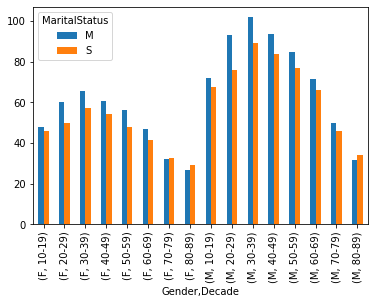

In [ ]:
# Visualize 'AveMonthSpend' it looks like 'Gender' and 'MaritalStatus' are very helpful in explaining
# the variance

HighestSpendSorted['AveMonthSpend'].unstack().plot(kind='bar');

In [ ]:
# Highest Average Monthly spending
HighestSpendSorted['AveMonthSpend'].idxmax()

('M', '30-39', 'M')

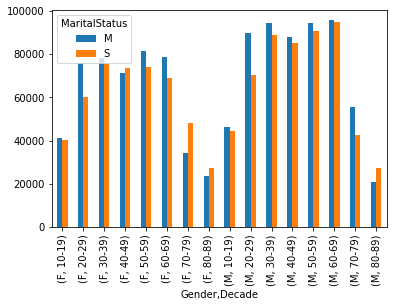

In [ ]:
# Visualize 'YearlyIncome' also grouped by 'Gender' and 'MaritalStatus'

HighestSpendSorted['YearlyIncome'].unstack().plot(kind='bar');

In [ ]:
# Continued on Income 
HighestSpendSorted['YearlyIncome'].unstack()

MaritalStatus             M             S
Gender Decade                            
F      10-19   41180.971429  40311.768061
       20-29   75773.618726  60354.304348
       30-39   78433.539216  75584.604977
       40-49   71533.342282  73700.374613
       50-59   81472.761079  74282.134228
       60-69   78779.301471  69224.484375
       70-79   34301.375000  48146.285714
       80-89   23805.200000  27346.000000
M      10-19   46351.988304  44383.926056
       20-29   89581.767936  70587.724191
       30-39   94205.540214  89010.133785
       40-49   87844.210208  85120.051095
       50-59   94602.524370  90703.913208
       60-69   95778.248062  94681.540984
       70-79   55562.250000  42704.000000
       80-89   20704.666667  27587.000000

In [ ]:
#Highest Average Income

HighestSpendSorted['YearlyIncome'].idxmax()

('M', '60-69', 'M')

In [ ]:
import matplotlib.pyplot

In [ ]:
# Let's check out relationships between numeric and categorical variables

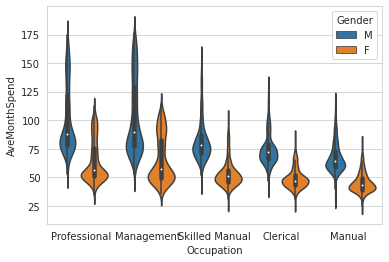

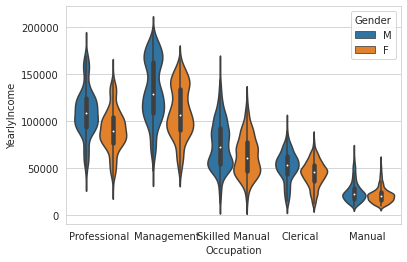

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'Occupation'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue='Gender', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend','YearlyIncome']
plot_violin(AWS, num_cols)

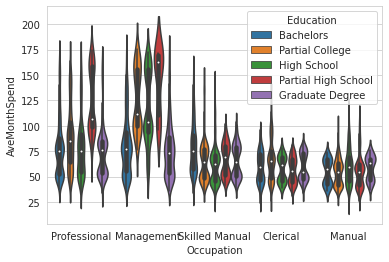

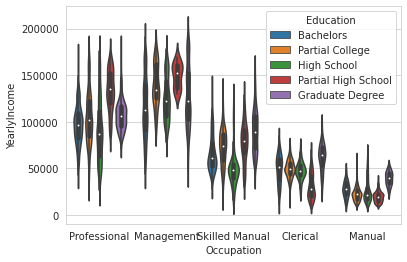

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'Occupation'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue='Education', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend','YearlyIncome']
plot_violin(AWS, num_cols)

In [ ]:
# Note the long tails on the numerical features, the right tail distribution becomes another mode
# on the upper salary range when the occupation is management, those high salaries are not so 
# much outliers for this category

# Note the highest median salary in management is associated with partial high school education only

# An important insight here is that the combination of occupation and gender seems 
# to explain variance better by having AveMonthSpend as the dependent variable 

# The combination of occupation and education
# seems to explain variance better by having Yearly Income as the dependent variable

# Note how the shape of the distributions is smoother in each case

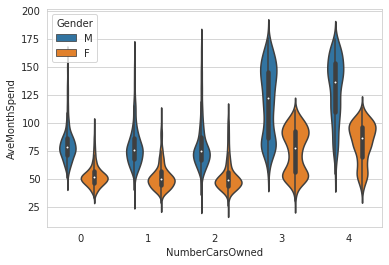

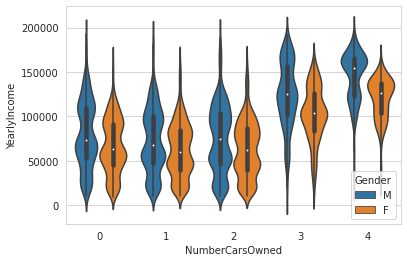

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'NumberCarsOwned'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue = 'Gender', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend', 'YearlyIncome']
plot_violin(AWS, num_cols)

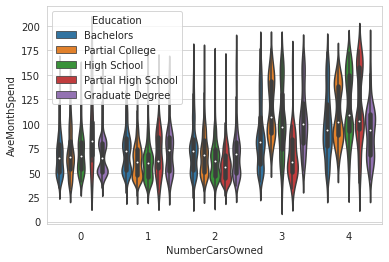

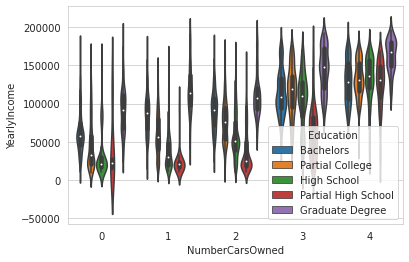

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'NumberCarsOwned'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue = 'Education', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend', 'YearlyIncome']
plot_violin(AWS, num_cols)

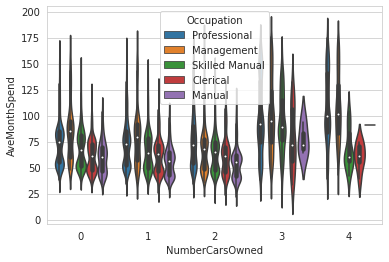

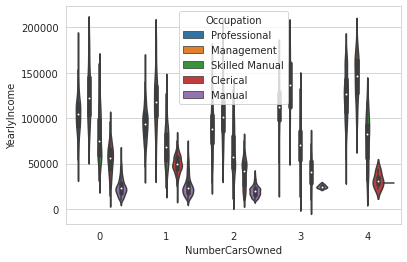

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'NumberCarsOwned'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue = 'Occupation', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend', 'YearlyIncome']
plot_violin(AWS, num_cols)

In [ ]:
# People that do manual labor just cannot afford 4 cars so we will group the last car group at 3-4

NumberCarsOwnedCategories = {0:'0', 1:'1', 
                    2:'2', 3:'3-4', 4:'3-4'}
AWS['NumberCarsOwned'] = [NumberCarsOwnedCategories[x] for x in AWS['NumberCarsOwned']]
AWS['NumberCarsOwned'].value_counts()

2      5767
1      4357
0      3788
3-4    2559
Name: NumberCarsOwned, dtype: int64

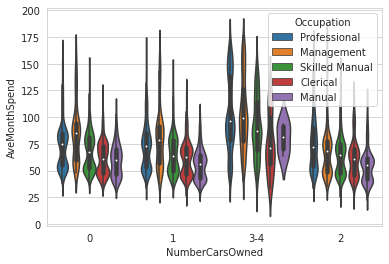

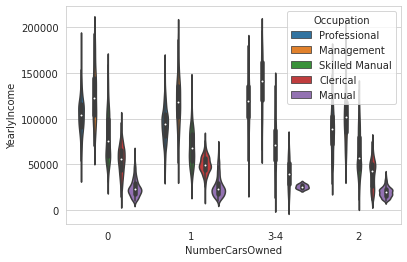

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'NumberCarsOwned'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue = 'Occupation', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend', 'YearlyIncome']
plot_violin(AWS, num_cols)

In [ ]:
# The combination of number of cars owned and gender seems 
# to explain variance better by having AveMonthSpend as the dependent variable 

# The combination of number of cars owned and education
# seems to explain variance better by having Yearly Income as the dependent variable

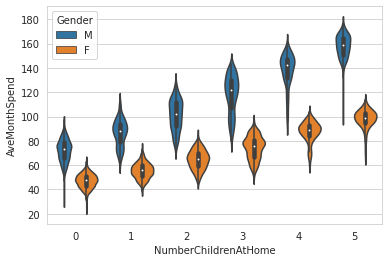

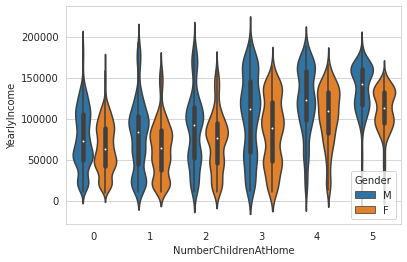

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'NumberChildrenAtHome'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue='Gender', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend', 'YearlyIncome']
plot_violin(AWS, num_cols)

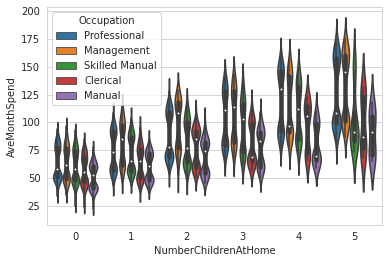

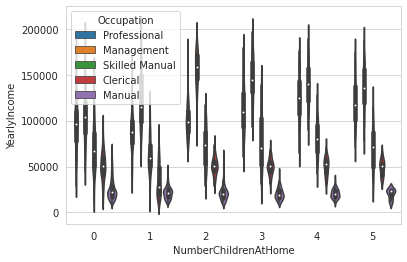

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'NumberChildrenAtHome'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue='Occupation', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend', 'YearlyIncome']
plot_violin(AWS, num_cols)

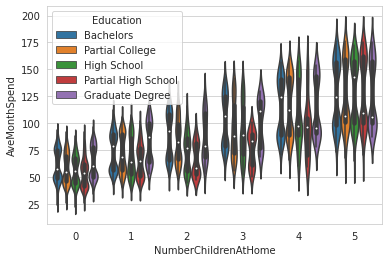

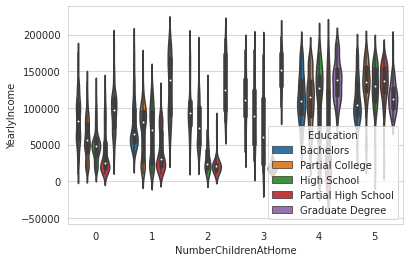

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'NumberChildrenAtHome'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue='Education', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend', 'YearlyIncome']
plot_violin(AWS, num_cols)

In [ ]:
# In the above plots we see the same relationship noted before, gender seems to be a better 
# explanation of the variance for Average Monthly Spend, while education seems to be a better
# explanation of the variance for Yearly income. Also females that are in the lower range of yearly
# income as outliers in low end are explained by occupation 

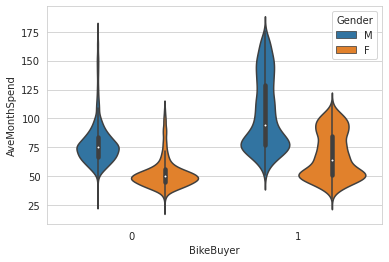

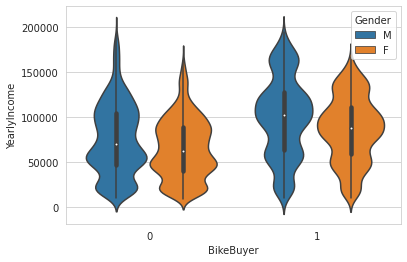

In [ ]:
# Note that we can view BikeBuyer but cannot use it as a feature because it is not in the test set


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue='Gender', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend','YearlyIncome']
plot_violin(AWS, num_cols)

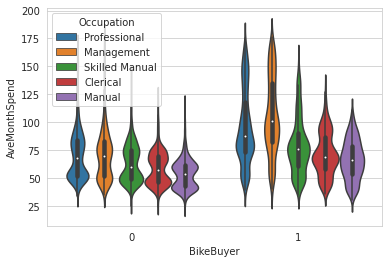

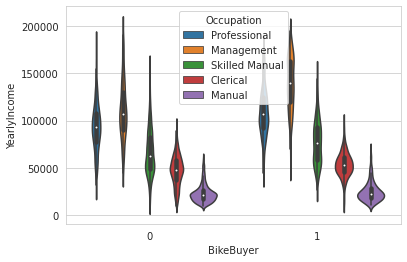

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue='Occupation', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend','YearlyIncome']
plot_violin(AWS, num_cols)

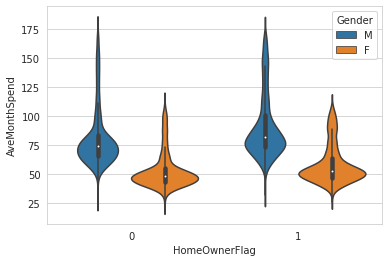

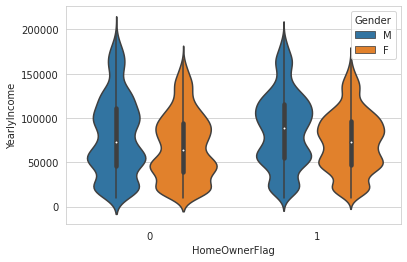

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'HomeOwnerFlag'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue='Gender', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend','YearlyIncome']
plot_violin(AWS, num_cols)

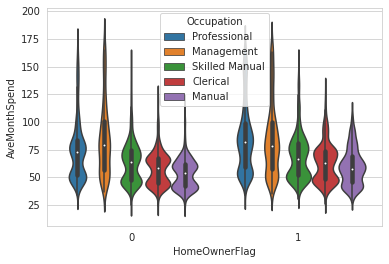

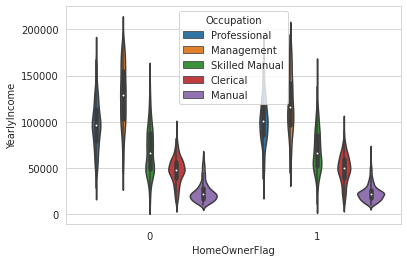

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_violin(AWS, cols, col_x = 'HomeOwnerFlag'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, hue='Occupation', data=AWS)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols=['AveMonthSpend','YearlyIncome']
plot_violin(AWS, num_cols)

In [ ]:
# In the above plots we see the same relationship noted before, gender seems to be a better 
# explanation of the variance for Average Monthly Spend, while occupation this time provided
# a very good explanation for the variance of bike buyer and home owner flag.

In [ ]:
# Let's see the correlation coefficient for YearlyIncome, 
# we want it to be high since AveMonthSpend is our dependent variable
# recall from the plots above that combined with Occupation
# it explains the multiple modes in YearlyIncome

AWS[['YearlyIncome','AveMonthSpend']].corr()

,YearlyIncome,AveMonthSpend
YearlyIncome,1.000000,0.607885
AveMonthSpend,0.607885,1.000000


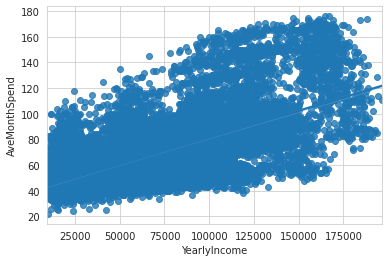

In [ ]:
# Looks great, let's fit a regression line to visualize

ax = sns.regplot(x="YearlyIncome", y="AveMonthSpend", data=AWS)

In [ ]:
# Good predictor variable, let's look at the distribution shapes of the numeric columns

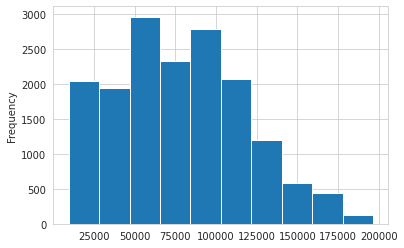

In [ ]:
AWS['YearlyIncome'].plot.hist();


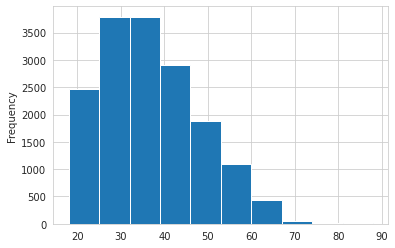

In [ ]:
AWS['Age'].plot.hist();

In [ ]:
# We need to apply some transformations to make the distributions look 
# approximately normal and less right skewed

AWS['SqrtYearlyIncome'] = np.sqrt(AWS['YearlyIncome'])
AWS['LogAge'] = np.log(AWS['Age'])


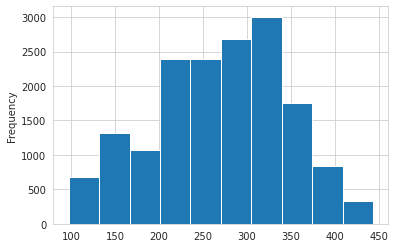

In [ ]:
AWS['SqrtYearlyIncome'].plot.hist();

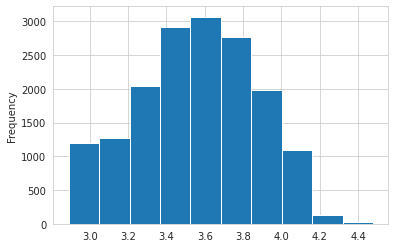

In [ ]:
AWS['LogAge'].plot.hist();

In [ ]:
# Don't forget to make sure the index is sequential

AWS.reset_index(drop=True)
AWS.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AveMonthSpend,BikeBuyer,Age,Decade,SqrtYearlyIncome,LogAge
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,Bachelors,Professional,M,M,1,0,0,137947,89,0,32,30-39,371.412170,3.465736
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,Bachelors,Professional,M,S,0,1,3,101141,117,1,33,30-39,318.026728,3.496508
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,Bachelors,Professional,M,M,1,1,3,91945,123,0,33,30-39,303.224339,3.496508
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,Bachelors,Professional,F,S,0,1,0,86688,50,0,30,20-29,294.428260,3.401197
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,Bachelors,Professional,F,S,1,3-4,5,92771,95,1,30,20-29,304.583322,3.401197


In [ ]:
# Bike buyer removed due to not being in the test set all outputs restarted and cleared

cat_features = ['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome',
        'Decade']

In [ ]:
num_features = ['LogAge', 'SqrtYearlyIncome']

In [ ]:
# Let's one hot encode the categorical features

def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = cat_features[1:]

Features = encode_string(AWS[cat_features[0]])
for col in categorical_columns:
    temp = encode_string(AWS[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 

(16471, 34)
[[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
Features = np.concatenate([Features, np.array(AWS[num_features])], axis = 1)
print(Features.shape)
print(Features[:2, :])   

(16471, 36)
[[  1.           0.           0.           0.           0.
    0.           0.           0.           1.           0.
    0.           1.           1.           0.           0.
    1.           1.           0.           0.           0.
    1.           0.           0.           0.           0.
    0.           0.           0.           1.           0.
    0.           0.           0.           0.           3.4657359
  371.41216997]
 [  1.           0.           0.           0.           0.
    0.           0.           0.           1.           0.
    0.           1.           0.           1.           1.
    0.           0.           1.           0.           0.
    0.           0.           0.           1.           0.
    0.           0.           0.           1.           0.
    0.           0.           0.           0.           3.49650756
  318.02672844]]


In [ ]:
# Let's check out the test data

import pandas as pd
TestData = pd.read_csv('/gdrive/My Drive/AW_test.csv')
TestData.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,United States,94536,133-555-0128,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,United States,91502,409-555-0193,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [ ]:
TestData.shape

(500, 23)

In [ ]:
# Drop unnescessary columns

TestData.drop(columns=['Title','Suffix','AddressLine2','MiddleName'], inplace=True)

In [ ]:
TestData.shape

(500, 19)

In [ ]:
# Remove Duplicates
TestData.drop_duplicates(inplace=True)
TestData.shape

(500, 19)

In [ ]:
TestData.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,Courtney,Baker,8727 Buena Vista Ave.,Fremont,California,United States,94536,133-555-0128,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,Adam,Allen,3491 Cook Street,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,Bonnie,Raji,359 Pleasant Hill Rd,Burbank,California,United States,91502,409-555-0193,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,Julio,Alonso,8945 Euclid Ave.,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,Christy,Andersen,"42, boulevard Tremblay",Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [ ]:
TestData.isnull().any()

CustomerID              False
FirstName               False
LastName                False
AddressLine1            False
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

In [ ]:
# Make sure our feature engineering is done the same way as in training

NumberCarsOwnedCategories = {0:'0', 1:'1', 
                    2:'2', 3:'3-4', 4:'3-4'}
TestData['NumberCarsOwned'] = [NumberCarsOwnedCategories[x] for x in TestData['NumberCarsOwned']]
TestData['NumberCarsOwned'].value_counts()

2      180
1      124
0      103
3-4     93
Name: NumberCarsOwned, dtype: int64

In [ ]:
# Same Transformations on Age so we can get the "decade" feature

TestData['BirthDate'] = pd.to_datetime(TestData['BirthDate'])

In [ ]:
TestData['Age'] = 1998 - TestData['BirthDate'].dt.year
TestData['Age'].head()

0    53
1    34
2    64
3    40
4    33
Name: Age, dtype: int64

In [ ]:
AWS['Age'].describe()

count    16471.000000
mean        36.446725
std         11.244468
min         18.000000
25%         28.000000
50%         35.000000
75%         44.000000
max         88.000000
Name: Age, dtype: float64

In [ ]:
TestData['Age'].describe()

count    500.000000
mean      36.468000
std       10.974235
min       18.000000
25%       28.000000
50%       35.000000
75%       44.000000
max       69.000000
Name: Age, dtype: float64

In [ ]:
# Less ages than in the train set, here we stop at 70, for train we had 80 and 90 Decade categories

bins = [10, 20, 30, 40, 50, 60, 70]
group_names = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
TestData['Decade'] = pd.cut(TestData['Age'], bins, labels=group_names)

In [ ]:
TestData['Decade'].isnull().any()

False

In [ ]:
# Same Numeric Transformations, if we scale we must USE STATISTICS FROM TRAINING DATA ONLY

TestData['SqrtYearlyIncome'] = np.sqrt(TestData['YearlyIncome'])
TestData['LogAge'] = np.log(TestData['Age'])


In [ ]:
TestData.columns

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'Age', 'Decade', 'SqrtYearlyIncome',
       'LogAge'],
      dtype='object')

In [ ]:
# Apparently we need to redefine cat_features because BikeBuyer is not in the given test set 

In [ ]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = cat_features[1:]

TestFeatures = encode_string(TestData[cat_features[0]])
for col in categorical_columns:
    temp = encode_string(TestData[col])
    TestFeatures = np.concatenate([TestFeatures, temp], axis = 1)

print(TestFeatures.shape)
print(TestFeatures[:2, :]) 

(500, 32)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
TestFeatures = np.concatenate([TestFeatures, np.array(TestData[num_features])], axis = 1)
print(TestFeatures.shape)
print(TestFeatures[:2, :])   

(500, 34)
[[  1.           0.           0.           0.           0.
    0.           1.           0.           0.           0.
    1.           0.           0.           1.           1.
    0.           0.           0.           1.           0.
    1.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    1.           0.           3.97029191 294.84063492]
 [  1.           0.           0.           0.           0.
    0.           0.           0.           0.           1.
    0.           1.           1.           0.           0.
    1.           0.           0.           1.           0.
    0.           0.           1.           0.           0.
    0.           0.           0.           1.           0.
    0.           0.           3.52636052 316.42534665]]


In [ ]:
# about 20% of data for the validation set

val_size = int(len(AWS)*.20)
val_size

3294

In [ ]:
# Set our label
AWS['LogAveMonthSpend'] = np.log(AWS['AveMonthSpend'])
labels = AWS['LogAveMonthSpend'].reset_index(drop=True)

In [ ]:
## Define the variance threhold and fit the threshold to the feature array. We don't have the 
## same number of features in train, val, test due to the small size of the test dataset
## we'll try to remove features with variance lower than the threshold to help this situation
## The number of features above the threshold should be the same
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(Features)

In [ ]:
## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

[ True False False  True False False False False  True  True  True  True
  True  True  True  True  True  True  True False  True False False False
 False False False  True  True  True False False False False False  True]
(16471, 18)


In [ ]:
# Let's look at one row to determine what needs to be scaled

Features_reduced[0]

array([  1.        ,   0.        ,   1.        ,   0.        ,
         0.        ,   1.        ,   1.        ,   0.        ,
         0.        ,   1.        ,   1.        ,   0.        ,
         0.        ,   1.        ,   0.        ,   1.        ,
         0.        , 371.41216997])

In [ ]:
## Randomly sample cases to create independent training and validation data
nr.seed(9988)
indx = range(Features_reduced.shape[0])
indx = ms.train_test_split(indx, test_size = val_size)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_val = Features[indx[1],:]
y_val = np.ravel(labels[indx[1]])

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train[:, 17:])
X_train[:, 17:] = scaler.transform(X_train[:, 17:])
X_val[:, 17:] = scaler.transform(X_val[:, 17:])
X_train[:2,]

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        , -0.60046446,  1.35236701, -0.42612414,
        -1.23640176, -0.39224086, -0.31303647, -0.26571504,  4.12327129,
        -0.23272301, -0.23578721, -0.64566378,  1.46121236, -0.50705761,
        -0.33771497, -0.157763  , -0.0453126 , -0.03019119,  0.20274014,
         0.09526313],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        , -0.60046446, -0.73944424, -0.42612414,
        -1.23640176, -0.39224086, -0.31303647,  3.76343011, -0.24252588,
        -0.23272301, -0.23578721, -0.64566378,  1.46121236, -0.50705761,
        -0.33771497, -0.15776

In [ ]:
## Transform the test feature array as well
TestFeatures_reduced = sel.fit_transform(TestFeatures)

In [ ]:
## Print the support and shape for the transformed features
print(sel.get_support())
print(TestFeatures_reduced.shape)

[ True False False  True False False False False  True  True  True  True
  True  True  True  True  True  True  True False  True False False False
 False False False  True  True  True False False False  True]
(500, 18)


In [ ]:
## testing data
## we are not actually going to use this as we don't have labels
## this actually represents how real new data would actually
## be tested, without knowing if the outcome is correct
## so I'm just going to prepare it so we can see how it
## uses the same process as validation data to get prepared
## just don't use testing statistics to scale the data
## just as we did with validation

nr.seed(9988)
indx = range(TestFeatures_reduced.shape[0])
indx = ms.train_test_split(indx, test_size = 1)
X_test = Features[indx[0],:]


In [ ]:
X_test[:, 17:] = scaler.transform(X_test[:, 17:])

In [ ]:
X_test[:2,]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        , -0.60046446, -0.73944424, -0.42612414,
         0.80879859, -0.39224086, -0.31303647, -0.26571504, -0.24252588,
        -0.23272301, -0.23578721, -0.64566378,  1.46121236, -0.50705761,
        -0.33771497, -0.157763  , -0.0453126 , -0.03019119,  0.11470214,
        -1.04402536],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        , -0.60046446, -0.73944424, -0.42612414,
         0.80879859, -0.39224086, -0.31303647, -0.26571504, -0.24252588,
        -0.23272301, -0.23578721, -0.64566378,  1.46121236, -0.50705761,
        -0.33771497, -0.15776

In [ ]:
len(X_test)

499

Mean Square Error      = 0.0027011334219300062
Root Mean Square Error = 0.05197242944032929
Mean Absolute Error    = 0.03934928217789416
Median Absolute Error  = 0.0306460764547678
R^2                    = 0.9773796846795533
Adjusted R^2           = 0.977262302090894


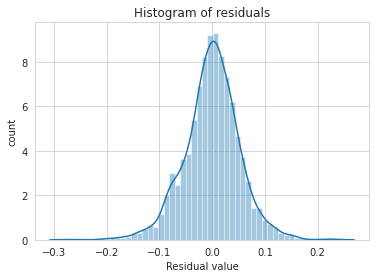

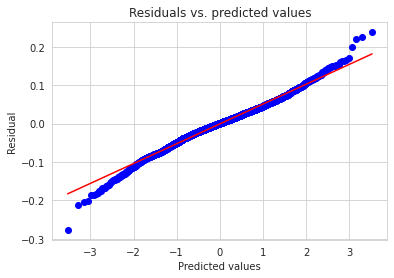

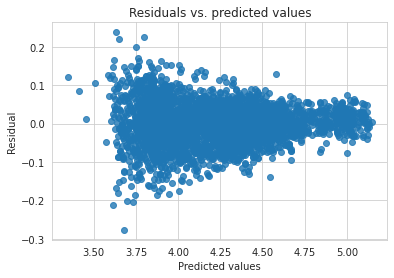

In [ ]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
    
# Predict with Validation set

y_score_val = lin_mod.predict(X_val) 
print_metrics(y_val, y_score_val, 18) 
hist_resids(y_val, y_score_val)  
resid_qq(y_val, y_score_val) 
resid_plot(y_val, y_score_val) 

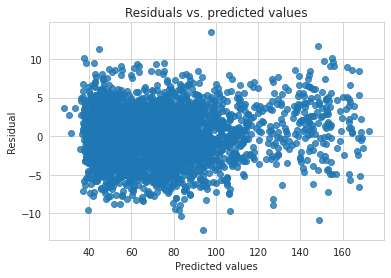

In [ ]:
# Actual residuals - recall that we took the log
# so we will transform it back 

y_score_val_untransform = np.exp(y_score_val)
y_val_untransform = np.exp(y_val)
resid_plot(y_val_untransform, y_score_val_untransform) 

In [ ]:
y_score_train = lin_mod.predict(X_train)

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Features')
    plt.ylabel('AveMonthPayment')

    plt.show()
    plt.close()

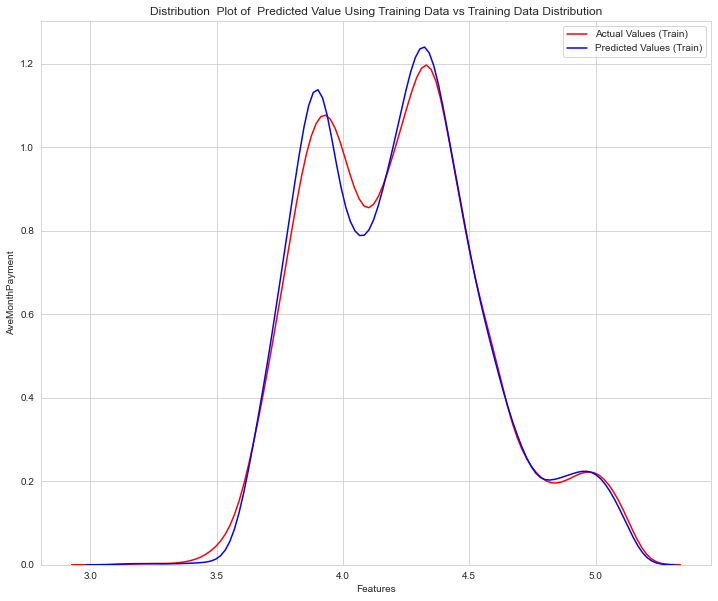

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, y_score_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

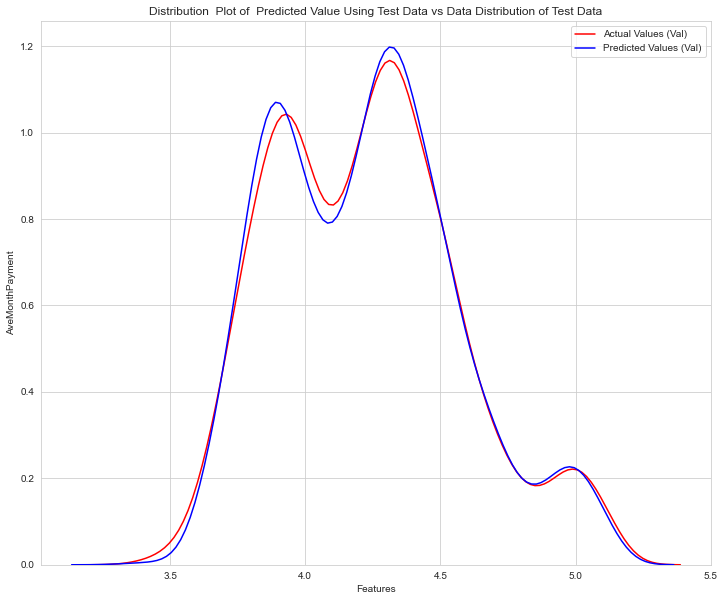

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_val,y_score_val,"Actual Values (Val)","Predicted Values (Val)",Title)

In [ ]:

# save numpy arrays as csv file
from numpy import asarray
from numpy import savetxt

# save to csv file
savetxt('/gdrive/My Drive/x_val_deterministic_regression.csv', X_val, delimiter=',')
savetxt('/gdrive/My Drive/y_val_deterministic_regression.csv', y_val, delimiter=',')
savetxt('/gdrive/My Drive/x_train_deterministic_regression.csv', X_train, delimiter=',')
savetxt('/gdrive/My Drive/y_train_deterministic_regression.csv', y_train, delimiter=',')

In [ ]:
import pickle
# save the model to disk
filename = '/gdrive/My Drive/deterministic_regression_model.sav'
model = lin_mod
pickle.dump(model, open(filename, 'wb'))